In [20]:
## BA222 Lecture 13b

## Running regressions in Python using Statsmodels

In [21]:
# Discussion: results you won't understand yet

# We have only learned just the basics of regression 
# And that it is a line through our data

# Regression has lots of important statistical properties that we need to learn
# These will be visible when we run regressions, and we don't know them all yet 

# Pedagogically, there is a choice between learning a lot about regressions in theory,
# then learning how to use them after
# Vs. 
# Learning about regressions and how to run them at the same time

# I chose the latter

# This is a complicated way of saying: there will be some things you don't understand about the regression output 
# But we will learn many of them in time

In [22]:
# The goal of today's lecture is to teach you how to run regressions in Python

In [23]:
# Import statements

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import sklearn
import pathlib

In [24]:
## Please download the Boston Housing dataset from Blackboard

# Variables
# There are 14 attributes in each case of the dataset. They are:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of black residents 
# LSTAT - % lower socioeconomic status of the population
# MEDV - Median value of owner-occupied homes in $1000's



## Read as CSV
BostonHousing = pd.read_csv(f"{pathlib.Path().cwd().parents[0]}/CSVs/BostonHousing.csv")
print(BostonHousing.shape)
#We have 506 rows and 14 columns
BostonHousing.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


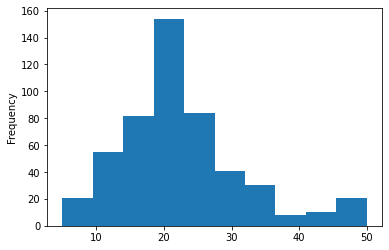

In [25]:
# Let's look at the median value of housing 

BostonHousing["MEDV"].plot.hist()
plt.show()
# This will be our outcome variable
# We want to explain these values using other neighborhood characteristics 


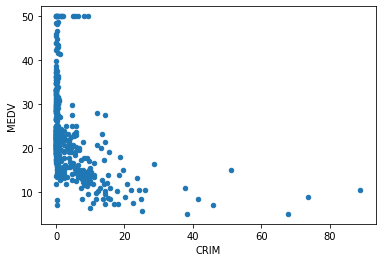

In [26]:
## We are going to start to explore the relationship between MEDV and CRIM -- home values and crime rates

BostonHousing.plot.scatter(y = "MEDV", x = "CRIM")
plt.show()

In [27]:
# To run regressions, we need the package Statsmodels
import statsmodels.api as sm

# From anaconda:
# Statsmodels is a Python module that allows users to explore data, 
# estimate statistical models, and perform statistical tests. 
# An extensive list of descriptive statistics, statistical tests, plotting functions, 
# and result statistics are available for different types of data and each estimator. 
# Researchers across fields may find that statsmodels fully meets their needs for 
# statistical computing and data analysis in Python.

In [28]:
# Recall a regression equation is of the form :

# Y_i = a + bX_i + e_i

# We need to specify the Y and the X columns for Python
# Statsmodels will fit a and b to the data to minimize the residual e_i 

# Now, technically, we have two regressors (independent variables)
# X
# A constant

# We can write the equation as:
# Y = a * 1 + b * X 

# So we need the data to be set up as:
# Y vector alone
# X and a column of ones together

# And statsmodels expects these as Pandas data frames

In [29]:
# Set up the data to regress MEDV on CRIM -- median value on crime
# We expect higher prices to be associated with lower crime

X = pd.DataFrame(BostonHousing["CRIM"])
# This gets the Crim column as a full data frame 

Xfull = sm.add_constant(X)
# This adds the column of 1s

Y = pd.DataFrame(BostonHousing["MEDV"])


In [30]:
# Look at our data before regressing, so we understand what's going on
Xfull.head()

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905


In [31]:
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [32]:
# Run the model -- quite simple syntax 
#model = sm.OLS(Y, Xfull)
    # This sets up and runs the model
#output = model.fit()
    # This makes it so we can see the results nicely
    
## Or all at once like this
output = sm.OLS(Y, Xfull).fit()


In [33]:
# This prints out the results summary
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           1.17e-19
Time:                        12:40:34   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# There is a lot going on here!
# The top part shows us some statistics about the regression
# The middle part shows us coefficients and their statistical properties 
# The bottom shows us more statistics about the regression

# Look at the "coef" column to see the fitted values -- the coefficient on the constant (a) and on CRIM (b)
# We will learn about a lot of the other stuff, in time (but not all of it)

## MEDV = a + b * CRIM

## We get
## MEDV = 24.0331 - 0.4152 CRIM

In [35]:
## Let's learn to interpret this 

# The negative coefficient on CRIM means that higher crime rates in a neighborhood 
# are associated with lower median home values. 

# From the data descriptor, we see CRIM is per capita crime rate by town
# And MEDV is the Median value of owner-occupied homes in $1000's
# (Recall these data are older so prices are lower)

# Our fitted regression equation says:

# For every 1 increase in CRIM -- that is, one more crime per capita 
# Home value is expected to be lower by 0.4152 thousands of dollars, i.e. $415.

In [36]:
# Is this interpretation causal or predictive?

# Probably just predictive

# While more crime can drive down property values, and we might expect there to be a causal relationship
# this regression doesn't prove it, so we cannot assert causality.

# For example, lower home values may cause crime -- because more economically distressed people move in 
# Or maybe the police don't expend as much effort in low home value areas
# Or maybe people living in lower home price areas have other characteristics (less education) associated with 
# higher crime rates. 

# There are many possible stories
# And we can't just say that crime /causes/ lower house prices

# These may be what we call jointly determined -- house prices and crime are driven by other factors 
# We may also say there is reverse causality -- not just crime determines prices, by prices drive crime
# In either case, we don't want to say the relationship is causal without more evidence

In [37]:
# Running regressions in Python:

# import pandas, statsmodels, matplotlib 

# Get an X and a Y data frame where Y is the column you want to predict/explain and X is the columns
# you want to use to explain it

# Make sure you add a constant to your X columns

# Run the two lines of statsmodels code to generate the model and output and summarize it

# Write Y = a + b X (fill in the values for a and b) to get your predictive model 
